In [23]:
from keras.models import load_model
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score, classification_report
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Montando o google drive para acessar imagens
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/Colab Notebooks/"

Mounted at /content/gdrive


Tamanho das imagens

In [3]:
IMAGE_SIZE = [400, 400]

In [4]:
train_path = path+'ebhi-split-2categorias/train'
valid_path = path+'ebhi-split-2categorias/val'
test_path = path+'ebhi-split-2categorias/test'

Declarando o modelo VGG16

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],
            weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


Não treina camadas

In [6]:
for layer in vgg.layers:
    layer.trainable = False

Adicionando as nossas camadas

In [7]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
#prediction = Dense(len(folders), activation='softmax')(x)
prediction = Dense(1, activation='sigmoid')(x)

Criando o modelo

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

Visualizando a estrutura do modelo

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 200, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 100, 100, 128)     0     

Declarando para o modelo as funções de custo e otimização

In [10]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(400, 400),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 1163 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(400, 400),
                                            batch_size=32,
                                            shuffle=False,
                                            class_mode='binary',classes=['ANORMAL','NORMAL'])

Found 390 images belonging to 2 classes.


In [15]:
valid_set = valid_datagen.flow_from_directory(valid_path,
                                              target_size=(400, 400),
                                              batch_size=32,
                                              class_mode='binary')

Found 387 images belonging to 2 classes.


Treinando o modelo

In [16]:
r = model.fit(
    training_set,
    validation_data=valid_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(valid_set)
)
model.save('hist_model_vgg.h5')

Epoch 1/10
37/37 [==============================] - 573s 15s/step - loss: 0.5050 - accuracy: 0.7876 - val_loss: 0.2576 - val_accuracy: 0.8915
Epoch 2/10
37/37 [==============================] - 99s 3s/step - loss: 0.2653 - accuracy: 0.8874 - val_loss: 0.3377 - val_accuracy: 0.8811
Epoch 3/10
37/37 [==============================] - 97s 3s/step - loss: 0.1528 - accuracy: 0.9304 - val_loss: 0.2353 - val_accuracy: 0.9044
Epoch 4/10
37/37 [==============================] - 88s 2s/step - loss: 0.1496 - accuracy: 0.9398 - val_loss: 0.1723 - val_accuracy: 0.9276
Epoch 5/10
37/37 [==============================] - 87s 2s/step - loss: 0.0662 - accuracy: 0.9776 - val_loss: 0.1808 - val_accuracy: 0.9199
Epoch 6/10
37/37 [==============================] - 86s 2s/step - loss: 0.0537 - accuracy: 0.9854 - val_loss: 0.2035 - val_accuracy: 0.9225
Epoch 7/10
37/37 [==============================] - 86s 2s/step - loss: 0.0580 - accuracy: 0.9828 - val_loss: 0.1752 - val_accuracy: 0.9302
Epoch 8/10
37/37 [

Perda do treino

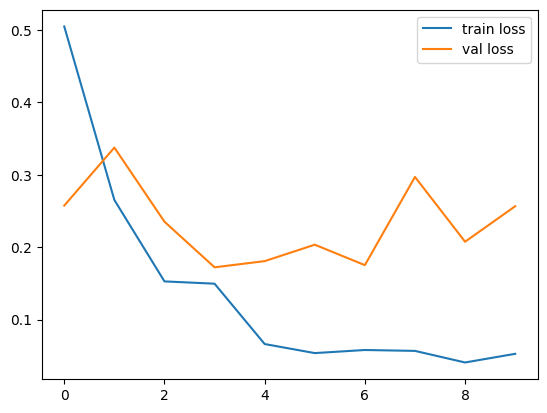

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss_vgg')
plt.show()

Acurácias do treino

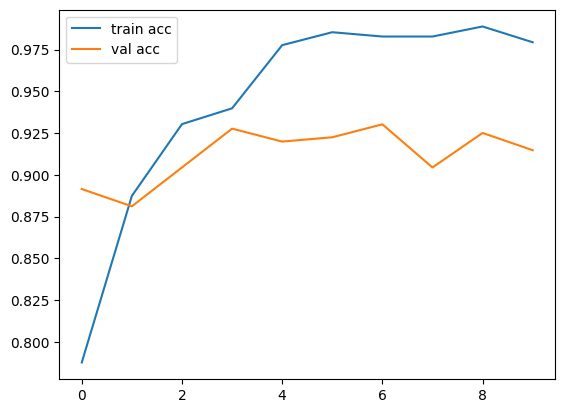

In [18]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('AccVal_acc_vgg')
plt.show()

Etapa de Testes

13/13 [==============================] - 187s 16s/step
y predito:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
y real:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

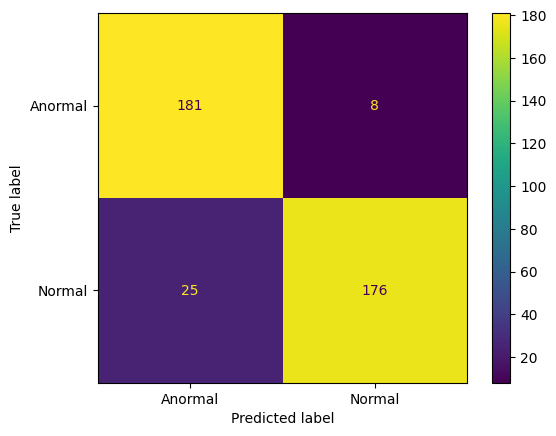

Accuracy score:  0.9153846153846154


In [19]:
vgg_model = model

t = time.time()
# Usando o modelo para predição das amostras de teste
y_pred = vgg_model.predict(test_set)
# Reset
test_set.reset()
#loss, acc = vgg_model.evaluate(test_set)
#aux = np.argmax(aux, axis=1)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()
print("y predito:")
print(y_pred)
y_true = test_set.classes
print("y real:")
print(y_true)
# Método para calcular o valor F1-Score
print('F1-Score: {}'.format(f1_score(y_true, y_pred, average='macro')))
# Método para calcular a Precision
print('Precision : {}'.format(precision_score(y_true, y_pred, average='macro')))
# Método para calcular o Recall
print('Recall: {}'.format(recall_score(y_true, y_pred, average='macro')))

print('Matriz de Confusão:')
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Anormal','Normal'])
cm_display.plot()
plt.savefig('Matriz-vgg16')
plt.show()

print ('Accuracy score: ', accuracy_score(y_true, y_pred))
#print('Acuracia obtida com o Vgg16 no Conjunto de Teste EBHI: {:.2f}'.format(
#    acc))



Avaliando no UnitoPatho

Found 600 images belonging to 2 classes.
19/19 [==============================] - 112s 6s/step - loss: 2.0722 - accuracy: 0.4867
y predito:
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 

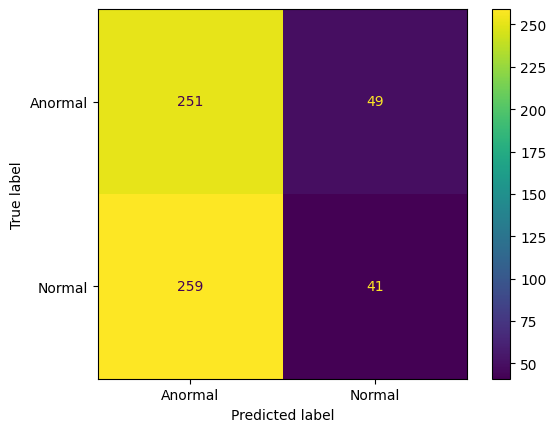

Accuracy score:  0.4866666666666667
Acuracia obtida com o Vgg16 no Conjunto de Teste UNITOPATHO: 0.49


In [22]:

from PIL import Image
from skimage import transform
#funcao carregar imagem
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (400, 400, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image


#pred2 = load(path+"dataset-unitopatho/ANORMAL/54-B2-TAHG.ndpi_ROI__mpp0.44_reg000_crop_sk00000_(73992,7343,1812,1812).png")
#pred2 = vgg_model.predict(pred2)
#print(np.where(pred2 > 0.5, 'Normal', 'Anormal').flatten())


test_path_uni = path+'/dataset-unitopatho/'
test_datagen_uni = ImageDataGenerator(rescale=1./255)
test_set_uni = test_datagen_uni.flow_from_directory(test_path_uni,
                                            target_size=(400, 400),
                                            batch_size=32,
                                            shuffle=False,
                                            class_mode='binary',classes=['ANORMAL','NORMAL'])



y_pred = vgg_model.predict(test_set_uni)
# Reset
test_set_uni.reset()
#loss, acc = vgg_model.evaluate(test_set_uni)
#aux = np.argmax(aux, axis=1)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()
print("y predito:")
print(y_pred)
y_true = test_set_uni.classes
print("y real:")
print(y_true)
# Método para calcular o valor F1-Score
print('F1-Score: {}'.format(f1_score(y_true, y_pred, average='macro')))
# Método para calcular a Precision
print('Precision : {}'.format(precision_score(y_true, y_pred, average='macro')))
# Método para calcular o Recall
print('Recall: {}'.format(recall_score(y_true, y_pred, average='macro')))


print('Matriz de Confusão:')
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Anormal','Normal'])
cm_display.plot()
plt.savefig('Matriz-vgg16-UNITOPATHO')
plt.show()

print ('Accuracy score: ', accuracy_score(y_true, y_pred))
#print('Acuracia obtida com o Vgg16 no Conjunto de Teste UNITOPATHO: {:.2f}'.format(
#    acc))


In [28]:
print(classification_report(y_true, y_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Acurácia cada classe')
cm.diagonal()



              precision    recall  f1-score   support

           0       0.49      0.84      0.62       300
           1       0.46      0.14      0.21       300

    accuracy                           0.49       600
   macro avg       0.47      0.49      0.42       600
weighted avg       0.47      0.49      0.42       600



array([0.83666667, 0.13666667])